In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [46]:
train_df=pd.read_csv('/kaggle/input/playground-series-s5e9/train.csv')

In [3]:
train_df

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
...,...,...,...,...,...,...,...,...,...,...,...
524159,524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235


In [105]:
train_df.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257586,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


# EDA

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_df= train_df.drop('id',axis=1)

In [109]:
# number of duplicate
train_df.duplicated().sum()

0

In [110]:
# number of null value
train_df.isnull().sum()

RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

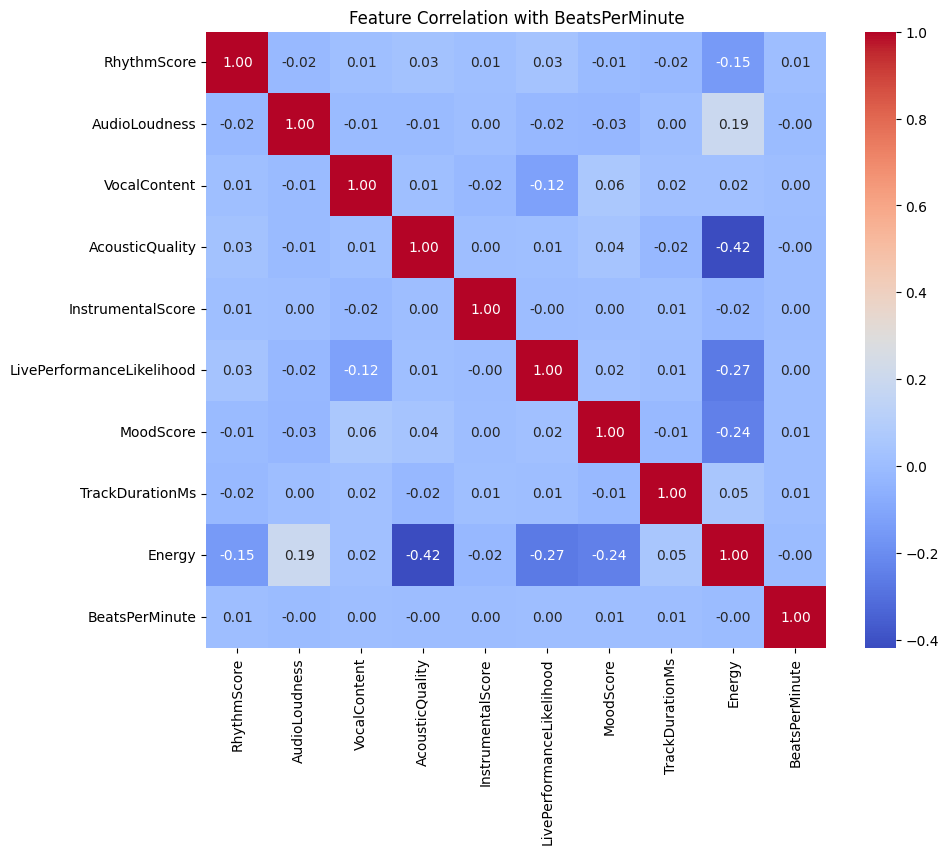

In [111]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation with BeatsPerMinute")
plt.show()

In [112]:
# Check for inf / -inf in each column
inf_check = train_df.isin([np.inf, -np.inf]).sum()
print("Count of inf / -inf values per column:\n")
print(inf_check[inf_check > 0])

Count of inf / -inf values per column:

Series([], dtype: int64)


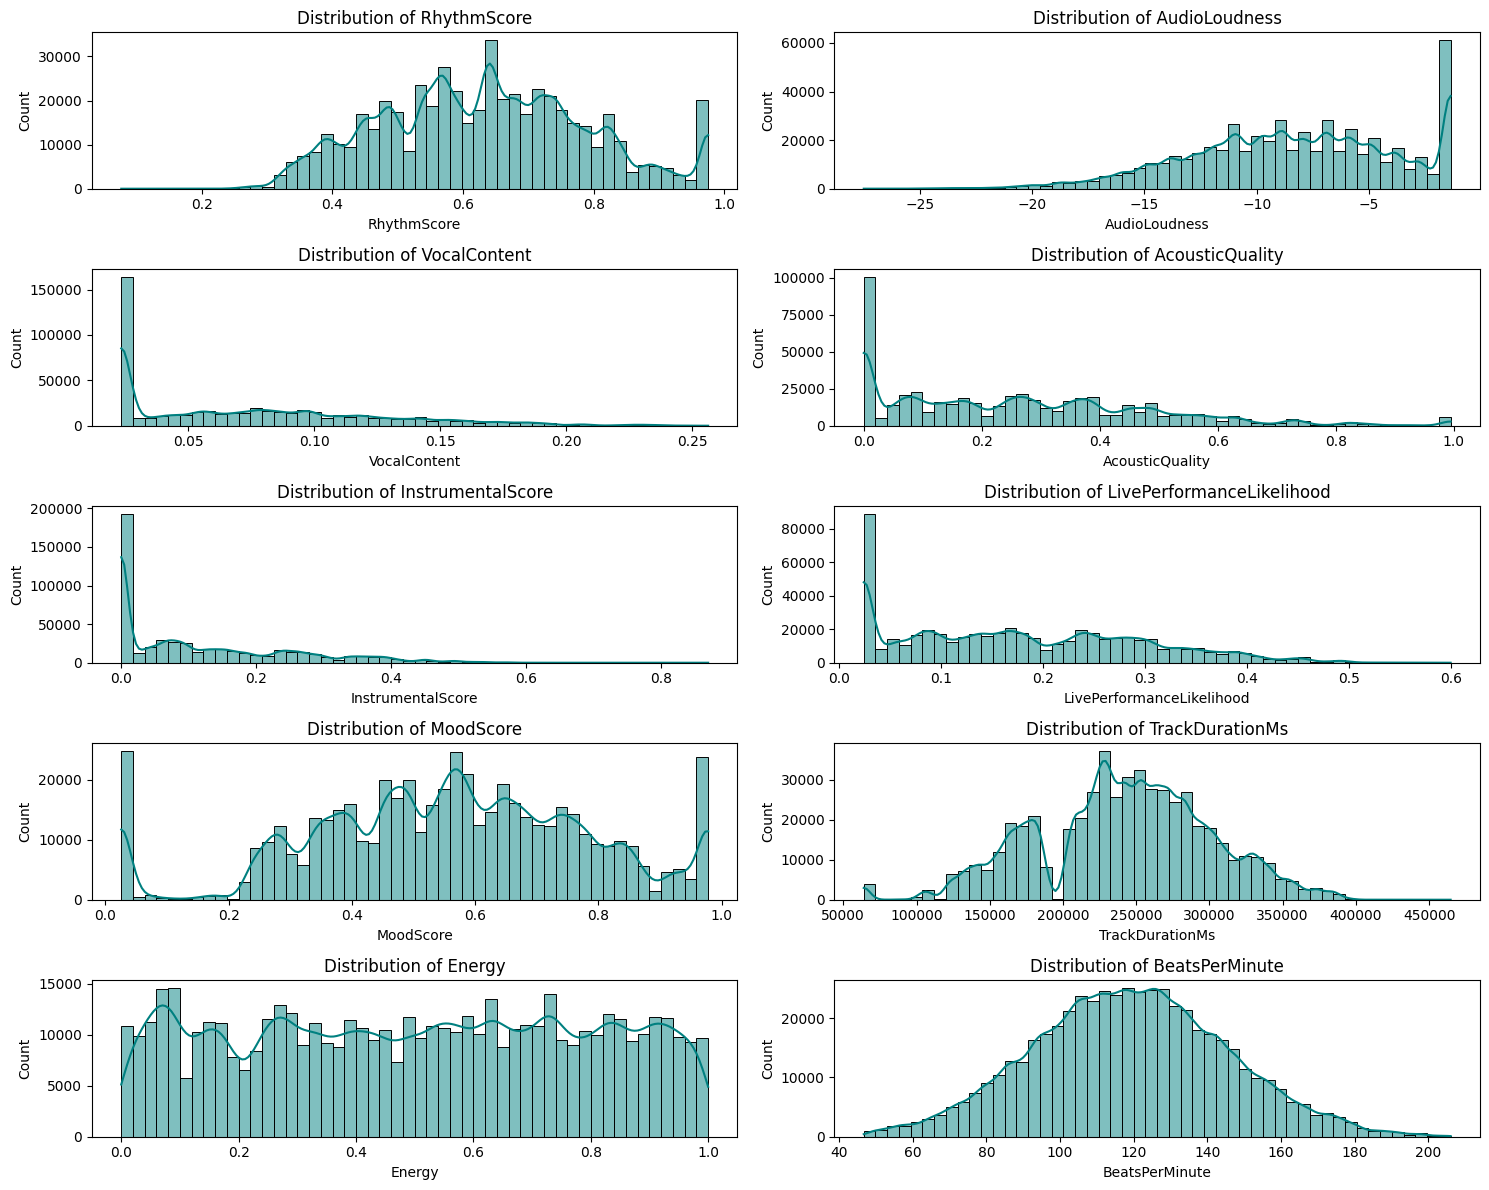

In [113]:
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
axes = axes.flatten()
column=train_df.columns
for i, col in enumerate(column):
    sns.histplot(train_df[col], bins=50, kde=True, ax=axes[i], color="teal")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

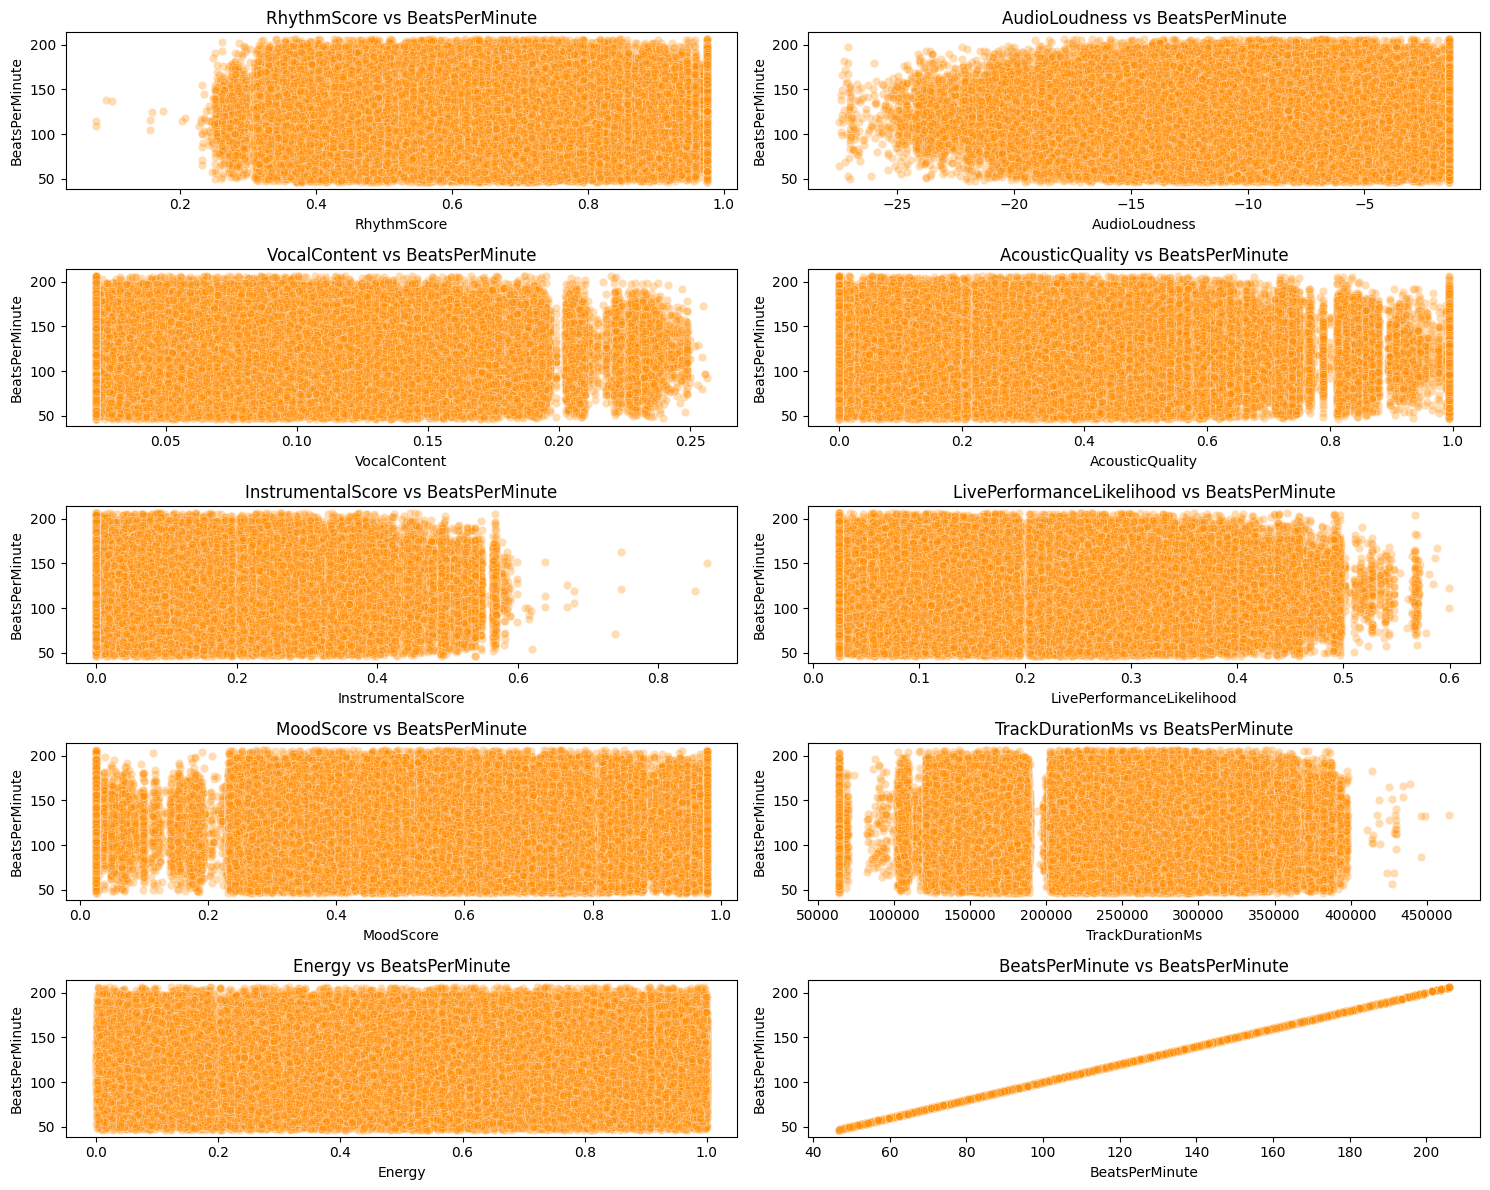

In [114]:
# --- Scatterplots vs Target in Subplots ---
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(column):
    sns.scatterplot(x=train_df[col], y=train_df["BeatsPerMinute"], alpha=0.3, ax=axes[i], color="darkorange")
    axes[i].set_title(f"{col} vs BeatsPerMinute")

plt.tight_layout()
plt.show()

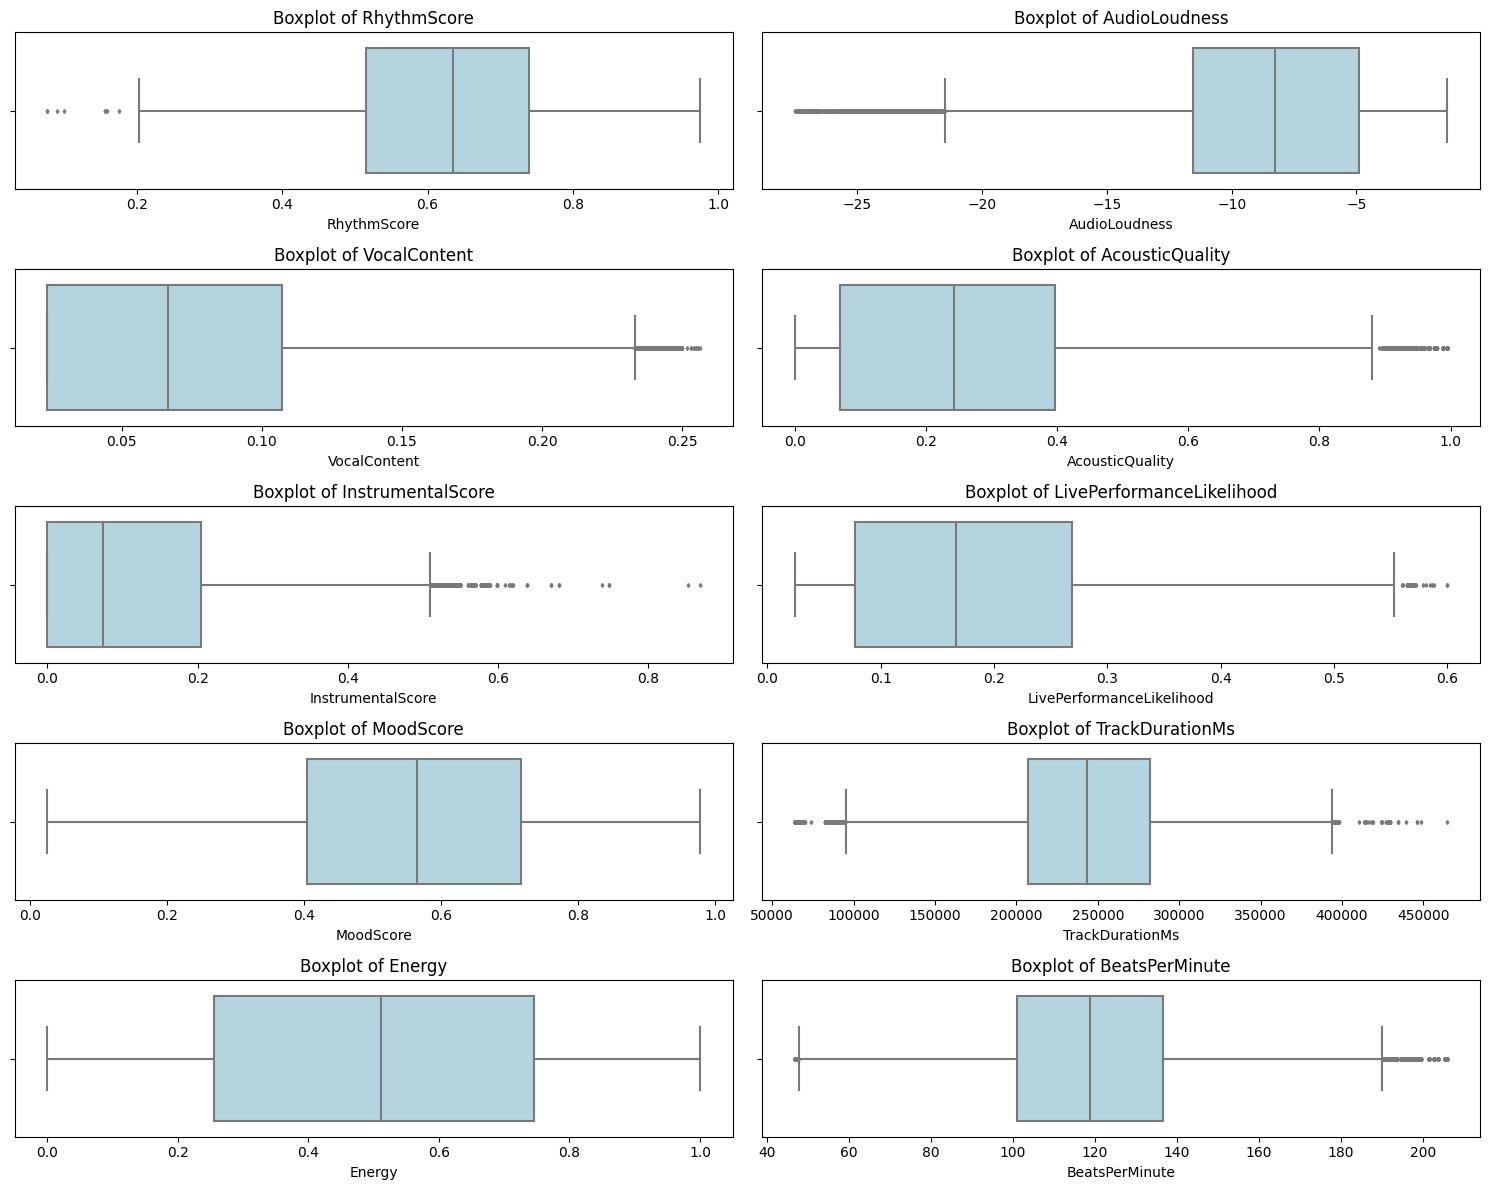

In [115]:
# --- Boxplots for features vs BeatsPerMinute ---
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(column):
    sns.boxplot(x=train_df[col], ax=axes[i], color="lightblue", fliersize=2)
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [40]:
# --- 1. TrackDuration in minutes (easier scale than ms) ---
train_df["TrackDurationMin"] = train_df["TrackDurationMs"] / 60000.0



# --- 3. Interaction features ---
train_df["Rhythm_Energy"] = train_df["RhythmScore"] * train_df["Energy"]
train_df["Mood_Acoustic"] = train_df["MoodScore"] * train_df["AcousticQuality"]
train_df["Instrumental_Vocal"] = train_df["InstrumentalScore"] * train_df["VocalContent"]

# --- 4. Ratios ---
train_df["Energy_to_Rhythm"] = train_df["Energy"] / (train_df["RhythmScore"] + 1e-6)
train_df["Acoustic_to_Vocal"] = train_df["AcousticQuality"] / (train_df["VocalContent"] + 1e-6)


# **Model**

In [22]:
from sklearn.linear_model import LinearRegression,lesso,R
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,RobustScaler
import lightgbm as lgb
from lightgbm import LGBMRegressor
from lightgbm.callback import early_stopping, log_evaluation

In [41]:
X=train_df.drop('BeatsPerMinute',axis=1)
y= train_df['BeatsPerMinute']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## without using scaling

In [10]:
clf=LinearRegression(  )
clf.fit(X_train,y_train)

LinearRegression()

In [12]:
y_predict=clf.predict(X_test)

In [13]:
mse=mean_squared_error(y_test, y_predict)
rmse_lin=np.sqrt(mse)
r2_lin = r2_score(y_test, y_predict)
print("Linear Regression RMSE:", rmse_lin)
print("Linear Regression R2:", r2_lin)

Linear Regression RMSE: 26.443791377552188
Linear Regression R2: 0.0001016474403807699


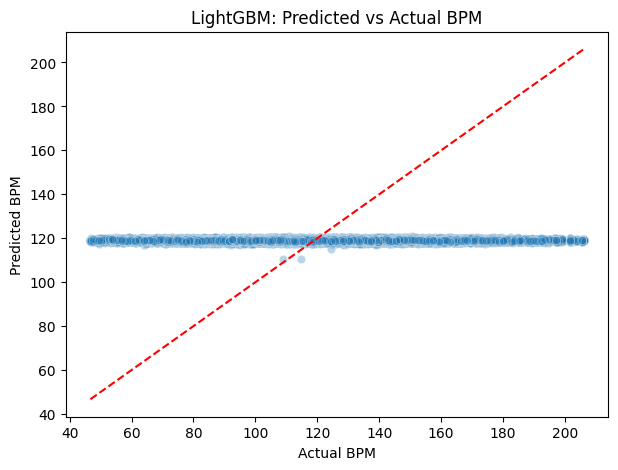

In [31]:
# Predicted vs Actual (LightGBM)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_predict, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("LightGBM: Predicted vs Actual BPM")
plt.xlabel("Actual BPM")
plt.ylabel("Predicted BPM")
plt.show()


* Linear Regression RMSE: 26.443791377552188
* Linear Regression R2: 0.0001016474403807699

## with using scaling

In [15]:
scale= StandardScaler()
scaled_train=scale.fit_transform(X_train)
scaled_test=scale.transform(X_test)

In [16]:
scaled_train = pd.DataFrame(scaled_train, columns=X_train.columns)
scaled_test = pd.DataFrame(scaled_test, columns=X_test.columns)

In [17]:
clf=LinearRegression()
clf.fit(scaled_train,y_train)
y_predict=clf.predict(scaled_test)

In [18]:
mse=mean_squared_error(y_test, y_predict)
rmse=np.sqrt(mse)
print('RMSE - ',rmse)

RMSE -  26.443791377552188


RMSE -  26.443830784519754

## light gbm

In [43]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_test)


In [24]:
# Define model with regularization
model = LGBMRegressor(
    objective="regression",
    learning_rate=0.03,
    num_leaves=31,
    max_depth=-1,
    feature_fraction=0.7,
    bagging_fraction=0.7,
    bagging_freq=5,
    lambda_l1=1.0,
    lambda_l2=1.0,
    min_child_samples=30,   # same as min_data_in_leaf
    n_estimators=5000,
    random_state=42
)

# Fit with early stopping
model.fit(
    scaled_train, y_train,
    eval_set=[(X_train_scaled , y_train), (X_valid_scaled, y_test)],
    eval_metric="rmse",
    callbacks=[early_stopping(200), log_evaluation(200)],
    
)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[Ligh

LGBMRegressor(bagging_fraction=0.7, bagging_freq=5, feature_fraction=0.7,
              lambda_l1=1.0, lambda_l2=1.0, learning_rate=0.03,
              min_child_samples=30, n_estimators=5000, objective='regression',
              random_state=42)

In [28]:
y_pred = model.predict(X_valid_scaled)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


In [29]:
mse=mean_squared_error(y_test, y_pred)
rmse_lin=np.sqrt(mse)
r2_lin = r2_score(y_test, y_pred)
print("Linear Regression RMSE:", rmse_lin)
print("Linear Regression R2:", r2_lin)

Linear Regression RMSE: 26.437731692241446
Linear Regression R2: 0.0005598551946698338



* Linear Regression RMSE: 26.438099052066597
* Linear Regression R2: 0.0005320799897484685

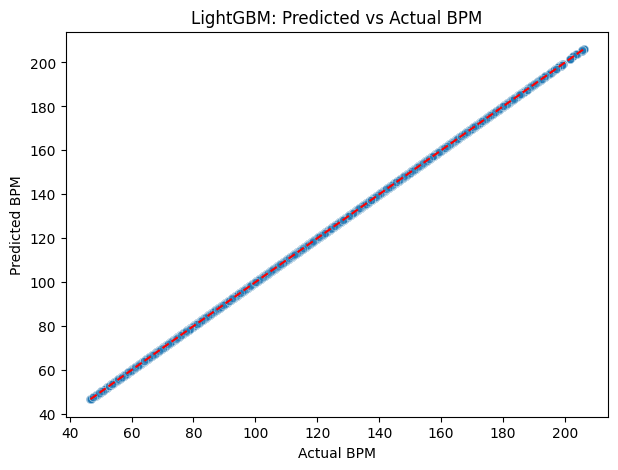

In [30]:
# Predicted vs Actual (LightGBM)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("LightGBM: Predicted vs Actual BPM")
plt.xlabel("Actual BPM")
plt.ylabel("Predicted BPM")
plt.show()

# multiple model

In [44]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

def evaluate_models(X_train, X_valid, y_train, y_valid):
    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.001, max_iter=10000),
        "XGBoost": XGBRegressor(
            n_estimators=5000,
            learning_rate=0.03,
            max_depth=4,
            subsample=0.7,
            colsample_bytree=0.7,
            reg_alpha=1.0,
            reg_lambda=1.0,
            random_state=42,
            n_jobs=-1
        ),
        "LightGBM": LGBMRegressor(
            objective="regression",
            learning_rate=0.03,
            num_leaves=31,
            max_depth=-1,
            feature_fraction=0.7,
            bagging_fraction=0.7,
            bagging_freq=5,
            lambda_l1=1.0,
            lambda_l2=1.0,
            min_child_samples=30,
            n_estimators=5000,
            random_state=42
        )
    }

    results = []

    for name, model in models.items():
        if name == "LightGBM":
            model.fit(
                X_train, y_train,
                eval_set=[(X_train, y_train), (X_valid, y_valid)],
                eval_metric="rmse",
                callbacks=[early_stopping(200, verbose=False), log_evaluation(200)]
            )
        elif name == "XGBoost":
            model.fit(
                X_train, y_train,
                eval_set=[(X_train, y_train), (X_valid, y_valid)],
                eval_metric="rmse",
                early_stopping_rounds=200,
                verbose=200
            )
        else:
            model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)

        rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        r2 = r2_score(y_valid, y_pred)
        print(f"Name = {name}, RMSE = {rmse:.4f}, R2 Score = {r2:.4f}")
        results.append({"Model": name, "RMSE": rmse, "R2 Score": r2})

    return pd.DataFrame(results).sort_values(by="RMSE")

# -----------------------
# Example usage (with scaled data)
# -----------------------
results_df = evaluate_models(X_train_scaled, X_valid_scaled, y_train, y_test)
print(results_df)


Name = LinearRegression, RMSE = 26.4440, R2 Score = 0.0001
Name = Ridge, RMSE = 26.4440, R2 Score = 0.0001
Name = Lasso, RMSE = 26.4440, R2 Score = 0.0001
[0]	validation_0-rmse:26.47338	validation_1-rmse:26.44522


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[200]	validation_0-rmse:26.42841	validation_1-rmse:26.44147
[280]	validation_0-rmse:26.41530	validation_1-rmse:26.44237
Name = XGBoost, RMSE = 26.4400, R2 Score = 0.0004
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=1.0,

              Model       RMSE  R2 Score
4          LightGBM  26.437686  0.000563
3           XGBoost  26.440015  0.000387
1             Ridge  26.443977  0.000088
0  LinearRegression  26.443977  0.000088
2             Lasso  26.444009  0.000085